# Contrastes de hipótesis

Como hemos comentado en la introducción, en los contrastes de hipótesis
paramétricos **vamos a asumir** un modelo estadístico para las
observaciones que dependerá de uno o varios parámetros. En este
seminario realizaremos contrastes para la media $\mu$, desviación típica
$\sigma$ y proporción $p$. Para cada contraste planteado existe un
*Estadístico de Contraste* (función de los valores muestrales), cuyo
valor nos ayudará a decidir si se rechaza o no $H_0$. En esta decisión,
juega un papel fundamental la distribución que tenga el Estadístico de
Contraste (EC) en el supuesto de que sea cierta la hipótesis $H_0$, de
forma que si obtenemos valores del EC poco probables, esto nos indicará
que debemos rechazar la hipótesis $H_0$.

Imagina que aplicas una nueva técnica para la gestión de tiempos en 
un departamento concreto de una empresa, y crees que con esta nueva técnica el
tiempo de atención al público disminuye
significativamente comparado con el tiempo promedio aceptado hasta ese
momento: 30 minutos. Entonces, tendremos dos hipótesis enfrentadas o **contraste de hipótesis**:

* __La hipótesis nula__ $H_0$: No hay diferencias en las técnicas empleadas.

* __La hipótesis alternativa__ $H_1$: Sí hay diferencias en las técnicas empleadas.

**teniendo que decidir si rechazar o no la hipótesis nula a partir de
una muestra de tiempos de atención al público.**

Cuando nuestra decisión sea **rechazar la hipótesis $H_0$**, diremos que
**el contraste ha resultado significativo**, porque nuestra intención ha
sido poner $H_0$ en entredicho (a prueba), ya que sospechábamos que no
era cierta con la nueva técnica. Sin embargo, los posibles errores que
se cometen a la hora de decidir son:

<img src = "figures/CuadroDecision.png",style="width: 512px;"\>


**No sabemos en qué casilla estamos porque no sabemos qué pasa con la
población en estudio**.

-   El primer error (también llamado error tipo I) será concluir/decidir
    que existen diferencias en los tratamientos, cuando en realidad no
    los hay. La probabilidad de cometer ese error se llama **nivel de
    significación**. El investigador, antes de realizar el análisis,
    fija el nivel de significación que está dispuesto a asumir. Suelen
    utilizarse valores pequeños como 0.10, 0.05 ó 0.01. Se dice entonces
    que **fijamos** un nivel de significación del 10%, 5% ó 1%.

    Las técnicas que vamos a estudiar en este seminario nos dicen, a
    partir de nuestra muestra, cuál es la probabilidad de cometer el
    error tipo I (**p-valor**), y si esta probabilidad es muy baja,
    podremos concluir que en la población también existen diferencias.

-   El segundo error (también llamado error tipo II) será
    concluir/decidir que no existen diferencias en los tratamientos,
    cuando en realidad sí los hay. La probabilidad de cometer este error
    se escribe con a letra $\beta$. Sin embargo, no suele utilizarse
    $\beta$, sino su complementario $1-\beta$, llamándose **potencia de
    un contraste**, es decir,
    $$\mbox{Potencia} = 1 - \beta = P(\mbox{Aceptar} \, H_1 | \mbox{Es
    cierta} \, H_1),$$ y significa la probabilidad de acertar al
    declarar el contraste significativo: __capacidad de nuestro estudio de
    detectar diferencias cuando existen en la realidad__.

    Es deseable que los contrastes que se utilicen sean lo más potentes
    posible, pero como veremos más adelante, cuantificar el error
    $\beta$ es difícil.


Los contrastes de hipótesis pueden dividirse en dos subgrupos:
**contrastes de hipótesis paramétricos** y **contrastes de hipótesis no
paramétricos**. Los primeros se basan en la suposición de que la
variable en estudio se distribuye según un modelo que depende de
parámetros, por ejemplo, si estamos interesados en estudiar el *el
tiempo de recuperación* de un paciente después de una operación de
ligamento cruzado, y suponemos que dicho tiempo de recuperación se
distribuye según un modelo **Normal** de media $\mu$ y desviación típica
$\sigma$, se escribe $\mathcal{N}(\mu, \sigma)$; entonces el objetivo
será estudiar los parámetros **poblacionales** $\mu$ y $\sigma$ teniendo
en cuenta los datos obtenidos en la muestra.

Los **contrastes de hipótesis no paramétricos** no suponen, en general,
ningún modelo estadístico para la variable en estudio (algunas veces
suelen asumirse propiedades generales a la distribución tales como
simetría o continuidad). El principal inconveniente de las técnicas de
inferencia no paramétrica es que desperdician mucha información, y por
ello **deben usarse si no existe una alternativa paramétrica**.

__A tener en cuenta__:

-   Que los resultados no sean estadísticamente significativos no indica
    que la hipótesis nula sea cierta.
-   El nivel de significación $\alpha$ lo fija el investigador a priori.
-   Un resultado puede ser estadísticamente significativo y no
    clínicamente relevante.


## Contrastes de hipótesis paramétricos

Recordemos el __Teorema Central del límite__:

En el caso de que la muestra $x_1, x_2, \dots x_n$ provenga de una distribución $N(\mu, \sigma)$ y siendo


$$ \overline{x} = \frac{\sum_{i=1}^n x_i }{n} \quad s^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n-1}$$

entonces se verifica

$$Z=\frac{\overline{x}-\mu}{\sigma/\sqrt{n}} \sim N(0,1), \quad T=\frac{\overline{x}-\mu}{s/\sqrt{n}} \sim t(n-1),
\quad X^2 = \frac{(n-1) s^2}{\sigma^2} \sim \chi^2(n-1)$$

Populating the interactive namespace from numpy and matplotlib


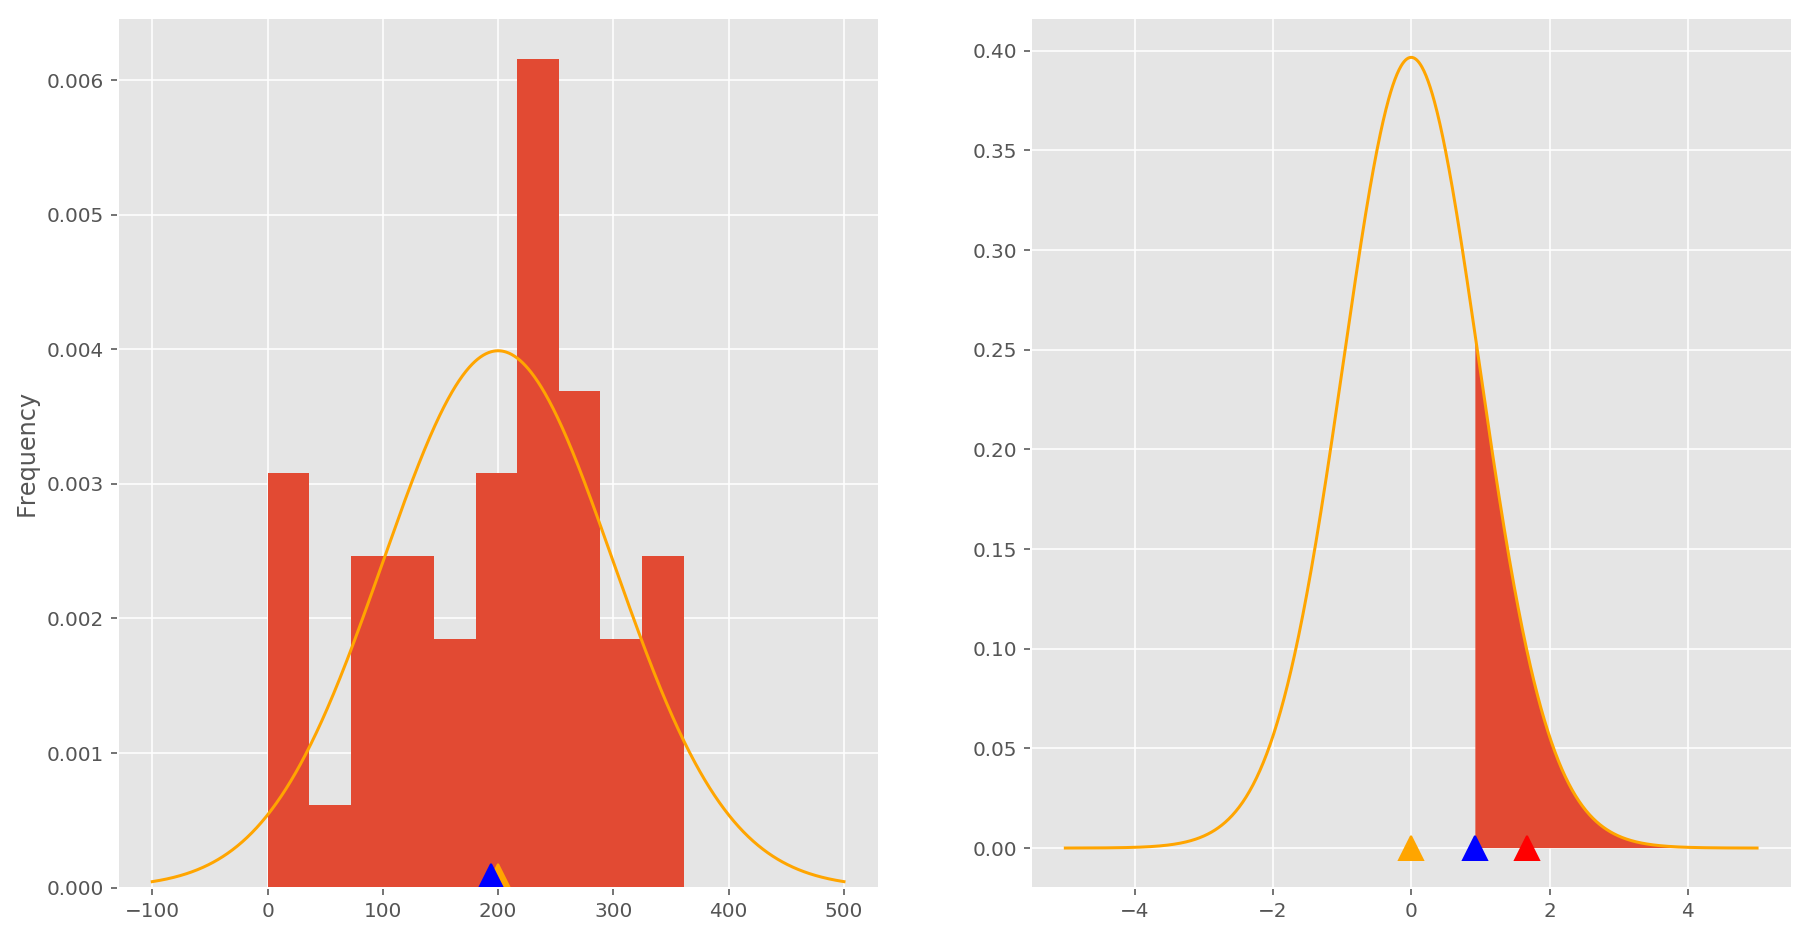

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import pandas as pd
import scipy.stats as st

# Create sample data.
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/drinks.csv')
muestra1 = drinks[drinks.continent=='EU']

#plt.figure(1)

fig, ax = plt.subplots(1,2,figsize=(15,8))

muestra1.beer_servings.plot(kind='hist', normed=True, ax=ax[0])
ax[0].plot(200,0, color='orange', marker='^', markersize=24)
ax[0].plot(muestra1.beer_servings.mean(),0, 'b^', markersize=24)

x = np.linspace(-100,500,1000)
y = st.norm(loc=200.0, scale=100.0).pdf(x)
ax[0].plot(x,y,color='orange')


mu_0 = 180.0
T=(muestra1.beer_servings.mean()-mu_0)/(muestra1.beer_servings.std()/np.sqrt(muestra1.beer_servings.size))

x = np.linspace(-5,5,1000)
y = st.t(muestra1.beer_servings.size-1.).pdf(x)
ax[1].plot(x,y,color='orange')
ax[1].plot(0,0, color='orange', marker='^', markersize=12)
ax[1].plot(T,0, color='blue', marker='^', markersize=12)
section = np.arange(T, 5, 1/20.)
ax[1].fill_between(section,st.t(muestra1.beer_servings.size-1.).pdf(section))

alpha = 0.05
quantil_pvalor = st.t(muestra1.beer_servings.size-1.).ppf(1.0-alpha)

ax[1].plot(quantil_pvalor,0, color='red', marker='^', markersize=12);

$$T=\frac{\overline{x}-\mu}{s/\sqrt{n}} \sim t(n-1)$$

### Pasos necesarios para realizar un contraste de hipótesis 

---- 

__[Ejemplo]__ En general se sabe que, el número medio de tercios de cerveza bebidos cada año 
por individuo y por año en el mundo es de 200. Después de varias campañas a nivel mundial con la que se espera
se reduzca la ingesta de alcohol de los seres humanos. Se han registrado el número de tercios de 
cerveza (```beer_servings```) en varios países a lo largo del mundo. 

**Suponiendo que el número de tercios por año e individuo sigue una distribución
Normal**, ¿puede afirmarse que el número de tercios por año e individuo está por encima de los 180?

__Paso 1. Planteamos el contraste__

Estamos ante un contraste unilateral 

$$
\begin{cases}
            H_0 :& \mu \leq 180 \\
            H_1 :& \mu > 180
\end{cases}$$

con una región crítica $RC = \{T_{exp} < t_{1- \alpha} (n-1) \}$

> Usamos la notación $t_{1- \alpha} (n-1)$ ó $t_{n-1, 1-\alpha}$ indistintamente.

__Paso 2. Calculamos el estadístico de contraste__

Puesto que la desviación típica ($\sigma$) no es conocida, tenemos

$$T_{exp} = \frac{\overline{x}- \mu_0}{s/\sqrt{n}} = 0.92765$$

En nuestro caso, $\mu_0 = 180$, $\overline{x}= 193.7777$, $s=99.6315$ con $n=45$.

__Paso 3. Decisión__

Fijamos el nivel de significación $\alpha = 0.05$. El **p-valor** en este caso es $P(t(n-1)>T_{exp})=0.1793$

En este caso $p-valor = 0.1793$ y como  $$p-valor = 0.1793 > 0.05 = \alpha$$

__No podemos rechazar $H_0$, el contraste NO es significativo__.

__Paso 4. Conclusión__

Fijado $\alpha = 0.05$, no hay evidencia, con la muestra suministrada, para asegurara que el __tiempo medio__ de atención al público disminuye con la nueva técnica.

----

**Hemos utilizado la medida $p-valor$, mínimo error $\alpha$ que tengo que aceptar para que el contraste sea significativo**. La siguiente tabla puede servir de ayuda a la decisión/conclusión de nuestros
contrastes:

  | Resultado | Decisión |
  |:-----------------|:-------------|
  |si $0.20<$ p-valor      |No significativo|
  |si $0.05<$ p-valor $<0.2$  |Dudoso|
  |si $0.01<$ p-valor $<0.05$ |Significativo|
  |si $0.001<$ p-valor $<0.01$|Muy significativo|
  |si p-valor $<0.001$ |Altamente significativo|

## Contrastes paramétricos en una población normal

**Suponemos** que la variable en estudio sigue una **distribución
normal**, es decir $X \sim \mathcal{N}(\mu,\sigma )$.

1.  Contrastes para el parámetro $\mu$

    -   Conocemos $\sigma ^2$. Debe utilizarse $d= \dfrac{(\overline{x}- \mu_0)\sqrt{n}}{\sigma}$
    
        $$\begin{array}{|c|c|c|}
        \hline
          H_0 & H_1 & \mbox{Región crítica}  \\
          \hline\hline
          \mu = \mu_0 & \mu = \mu_1> \mu_0 & d \geq z_{1- \alpha}  \\
          \hline
          \mu = \mu_0 & \mu = \mu_1< \mu_0 & d \leq z_{\alpha}  \\
          \hline
          \mu = \mu_0 & \mu \neq \mu_0 & \mbox{$d \geq z_{1- \alpha/2}$ ó $d\leq z_{\alpha/2}$} \\
          \hline
        \mbox{$\mu \leq \mu_0$ ó $\mu = \mu_0$ } & \mu > \mu_0 & d \geq z_{1- \alpha} \\
          \hline
        \mbox{$\mu \geq \mu_0$ ó $\mu = \mu_0$ }  & \mu < \mu_0 & d \leq z_{\alpha} \\
          \hline
        \end{array}$$

    -   Desconocemos $\sigma ^2$. Debe utilizarse $d= \dfrac{(\overline{x}- \mu_0)\sqrt{n}}{s}$
        
        $$\begin{array}{|c|c|c|}
        \hline
          H_0 & H_1 & \mbox{Región crítica}  \\
          \hline\hline
          \mu = \mu_0 & \mu = \mu_1> \mu_0 & d \geq t_{n-1,1- \alpha}  \\
          \hline
          \mu = \mu_0 & \mu = \mu_1< \mu_0 & d \leq t_{n-1,\alpha}  \\
          \hline
          \mu = \mu_0 & \mu \neq \mu_0 & \mbox{$d \geq t_{n-1,1- \alpha/2}$ ó $d\leq t_{n-1,\alpha/2}$}  \\
          \hline
        \mbox{$\mu \leq \mu_0$ ó $\mu = \mu_0$ }  & \mu > \mu_0 & d \geq t_{n-1,1- \alpha} \\
          \hline
        \mbox{$\mu \geq \mu_0$ ó $\mu = \mu_0$ }  & \mu < \mu_0 & d \leq t_{n-1,\alpha} \\
          \hline
        \end{array}$$

2.  Contrastes para el parámetro $\sigma ^2$. Debe utilizarse $d=
    \dfrac{(n-1)s^2}{\sigma_0^2}$ $$\begin{array}{|c|c|c|}
    \hline
      H_0 & H_1 & \mbox{Región crítica}  \\
      \hline\hline
      \sigma^2 = \sigma_0^2 & \sigma^2 = \sigma_1^2> \sigma_0^2 & d \geq \chi_{n-1,1- \alpha}^2  \\
      \hline
      \sigma^2 = \sigma_0^2 & \sigma^2 = \sigma_1^2< \sigma_0^2 & d \leq \chi_{n-1,\alpha}^2  \\
      \hline
      \sigma^2 = \sigma_0^2 & \sigma^2 \neq \sigma_0^2 & \mbox{$d \geq \chi_{n-1,1- \alpha/2}^2$ ó $d\leq \chi_{n-1,\alpha/2}^2$}  \\
      \hline
    \mbox{$\sigma^2 \leq \sigma_0^2$ ó $\sigma^2 = \sigma_0^2$}  & \sigma^2 > \sigma_0^2 & d \geq \chi_{n-1,1- \alpha}^2 \\
      \hline
    \mbox{$\sigma^2 \geq \sigma_0^2$ ó $\sigma^2 = \sigma_0^2$}  & \sigma^2 < \sigma_0^2 & d \leq \chi_{n-1,\alpha}^2 \\
      \hline
    \end{array}$$



#### Contraste para la media poblacional (desconocemos $\sigma^2$)

Para un contraste bilateral

$$\begin{cases}
            H_0 :& \mu = 180 \\
            H_1 :&  \mu \neq 180
\end{cases}$$

In [4]:
st.ttest_1samp(muestra1.beer_servings, 180.0)

Ttest_1sampResult(statistic=0.92765921699223042, pvalue=0.35864535578528034)

In [5]:
mu_0 = 180.0

sample_mean = muestra1.beer_servings.mean()
sample_std = muestra1.beer_servings.std()
n= muestra1.beer_servings.size

T=(sample_mean-mu_0)/(sample_std/np.sqrt(n))
p_value = st.t(n-1).cdf(-T) + st.t(n-1).sf(T)
#p_value = 2 * st.t(n-1).sf(T)

print("Estadísitico y p-valor:              T = %g  p-valor = %g" % (T, p_value))

Estadísitico y p-valor:              T = 0.927659  p-valor = 0.358645


Para un contraste unilateral 

$$\begin{cases}
            H_0 :& \mu \geq 180 \\
            H_1 :&  \mu < 180
\end{cases}$$

In [6]:
p_value = st.t(n-1).sf(T)

print("Estadísitico y p-valor:              T = %g  p-valor = %g" % (T, p_value))

Estadísitico y p-valor:              T = 0.927659  p-valor = 0.179323


#### Contraste para la varianza poblacional

Para un contraste unilateral 

$$\begin{cases}
            H_0 :& \sigma^2 \geq 200 \\
            H_1 :& \sigma^2 < 200
\end{cases}$$

In [7]:
sigma_0 = 200.0

d = (n-1)*sample_std**2/(sigma_0)**2
st.chi2(n-1).cdf(d)

8.15937659690337e-08

Para un contraste unilateral 

$$\begin{cases}
            H_0 :& \sigma^2 \leq 200 \\
            H_1 :& \sigma^2 > 200
\end{cases}$$

In [8]:
st.chi2(n-1).sf(d) #survaival function

0.99999991840623403

Para un contraste bilateral

$$\begin{cases}
            H_0 :& \sigma^2 = 200 \\
            H_1 :& \sigma^2 \neq 200
\end{cases}$$

In [9]:
lower_quantile = st.chi2(n-1).ppf(alpha/2.0)
upper_quantile = st.chi2(n-1).ppf(1.0-alpha/2.0)
print("Región crítica y EC:              L = %g  U = %g Xi2 = %g " % (lower_quantile, upper_quantile,d))

Región crítica y EC:              L = 27.5746  U = 64.2015 Xi2 = 10.9191 


## Contrastes paramétricos en dos poblaciones normales DEPENDIENTES
**Asumimos** que se las variables se distribuyen como $X\sim \mathcal{N}(\mu_1,\sigma_1)$,
$Y \sim \mathcal{N}(\mu_2,\sigma_2)$. 

En el caso de tener **muestras dependientes/pareadas**, es decir, mismos
individuos a los que se ha medido una variable antes y después de cierto
tratamiento, _procederemos restando ambas variables y aplicando un
contraste para una población de los que hemos visto en la sección
anterior_.

Para un contraste bilateral

$$\begin{cases}
            H_0 :& \mu_1 = \mu_2 \\
            H_1 :&  \mu_1 \neq \mu_2
\end{cases}
\qquad \mbox{ equivalente } \qquad
\begin{cases}
            H_0 :& \mu_1 - \mu_2 = \mu_{diff} = 0 \\
            H_1 :&  \mu_1 - \mu_2 =  \mu_{diff} \neq 0
\end{cases}
$$

In [10]:
data = muestra1.beer_servings.values
data1 = st.norm.rvs(size=muestra1.beer_servings.values.shape[0]) * 5
data2 = data1 + data
st.ttest_rel(data2, data1)

Ttest_relResult(statistic=13.047078019632666, pvalue=1.0046640911303952e-16)

In [11]:
st.ttest_1samp(data,0)

Ttest_1sampResult(statistic=13.047078019632666, pvalue=1.0046640911303952e-16)

## Contrastes paramétricos en dos poblaciones normales INDEPENDIENTES

En el caso de tener **muestras independientes**, es decir, una variable
en estudio para dos poblaciones diferentes, **asumimos** que se
distribuyen como $X\sim \mathcal{N}(\mu_1,\sigma_1)$,
$Y \sim \mathcal{N}(\mu_2,\sigma_2)$ ($X$ e $Y$ independientes).
Entonces

1.  Contrastes para $\mu_1$ y $\mu_2$

    -   Conocemos $\sigma ^2_1$ y $\sigma ^2_2$. Debe utilizarse
        $d= \dfrac{\overline{x}-\overline{y}}{\sqrt{\frac{\sigma_1^2}{n}+\frac{\sigma_2^2}{m}}}$
        $$\begin{array}{|c|c|c|}
        \hline
          H_0 & H_1 & \mbox{Región crítica}  \\
          \hline\hline
           \mu_1 = \mu_2 & \mu_1 \neq \mu_2 & \mbox{$d \geq z_{1- \alpha/2}$ ó $d\leq z_{\alpha/2}$}  \\
          \hline
        \mbox{$\mu_1 \leq \mu_2$ ó $\mu_1 = \mu_2$}  & \mu_1 > \mu_2 & d \geq z_{1- \alpha} \\
          \hline
        \mbox{$\mu_1 \geq \mu_2$ ó $\mu_1 = \mu_2$}  & \mu_1 < \mu_2 & d \leq z_{\alpha} \\
          \hline
        \end{array}$$

    -   Desconocemos $\sigma ^2_1$ y $\sigma ^2_2$, pero sabemos que $\sigma ^2_1 = \sigma^2_2$.
    Debe utilizarse $d=\dfrac{\overline{x}-\overline{y}}{\hat{S}_{conj}\sqrt{\frac{1}{n}+\frac{1}{m}}}$, siendo $\hat{S}_{conj}=\sqrt{\frac{(n-1)s_1^2+(m-1)s_2^2}{n+m-2}}$
$$\begin{array}{|c|c|c|}
        \hline
          H_0 & H_1 & \mbox{Región crítica}  \\
          \hline\hline
           \mu_1 = \mu_2 & \mu_1 \neq \mu_2 & \mbox{$d \geq t_{n+m-2, 1- \alpha/2}$ ó $d\leq t_{n+m-2, \alpha/2}$} \\
          \hline
        \mbox{$\mu_1 \leq \mu_2$ ó $\mu_1 = \mu_2$}  & \mu_1 > \mu_2 & d \geq t_{n+m-2, 1- \alpha} \\
          \hline
        \mbox{$\mu_1 \geq \mu_2$ ó $\mu_1 = \mu_2$} & \mu_1 < \mu_2 & d \leq t_{n+m-2, \alpha} \\
          \hline
        \end{array}$$

    -   Desconocemos $\sigma ^2_1$ y $\sigma ^2_2$, pero sabemos que
        $\sigma ^2_1 \neq \sigma
        ^2_2$. Debe utilizarse $d=
        \dfrac{\overline{x}-\overline{y}}{\sqrt{\frac{s_1^2}{n}+\frac{s_2^2}{m}}}
        $ $$\begin{array}{|c|c|c|}
        \hline
          H_0 & H_1 & \mbox{Región crítica}  \\
          \hline\hline
           \mu_1 = \mu_2 & \mu_1 \neq \mu_2 & \mbox{$d \geq t_{n+m-2-g, 1- \alpha/2}$ ó $d\leq t_{n+m-2-g, \alpha/2}$}  \\
          \hline
        \mbox{$\mu_1 \leq \mu_2$ ó $\mu_1 = \mu_2$}  & \mu_1 > \mu_2 & d \geq t_{n+m-2-g, 1- \alpha} \\
          \hline
        \mbox{$\mu_1 \geq \mu_2$ ó $\mu_1 = \mu_2$}  & \mu_1 < \mu_2 & d \leq t_{n+m-2-g, \alpha} \\
          \hline
        \end{array}$$ siendo  $g= \dfrac{[(m-1)T_1-(n-1)T_2]^2}{(m-1)T_1^2+(n-1)T_2^2}$, $T_1= \dfrac{s_1^2}{n}$ y $T_2= \dfrac{s_2^2}{m}$

2.  Contrastes para $\sigma ^2_1$ y $\sigma ^2_2 $. Debe utilizarse $d=
    \frac{s_1^2}{s_2^2}$ $$\begin{array}{|c|c|c|}
    \hline
      H_0 & H_1 & \mbox{Región crítica}  \\
      \hline\hline
      \sigma_1^2 = \sigma_2^2 & \sigma_1^2 \neq \sigma_2^2 & \mbox{$d \geq F_{n-1,m-1,1- \alpha/2}$ ó $d\leq F_{n-1,m-1,\alpha/2}$}  \\
      \hline
    \mbox{$\sigma_1^2 \leq \sigma_2^2$ ó $\sigma_1^2 = \sigma_2^2$}  & \sigma_1^2 > \sigma_2^2 & d \geq F_{n-1,m-1,1- \alpha} \\
      \hline
    \mbox{$\sigma_1^2 \geq \sigma_2^2$ ó $\sigma_1^2 = \sigma_2^2$}  & \sigma_1^2 < \sigma_2^2 & d \leq F_{n-1,m-1,\alpha} \\
      \hline
    \end{array}$$


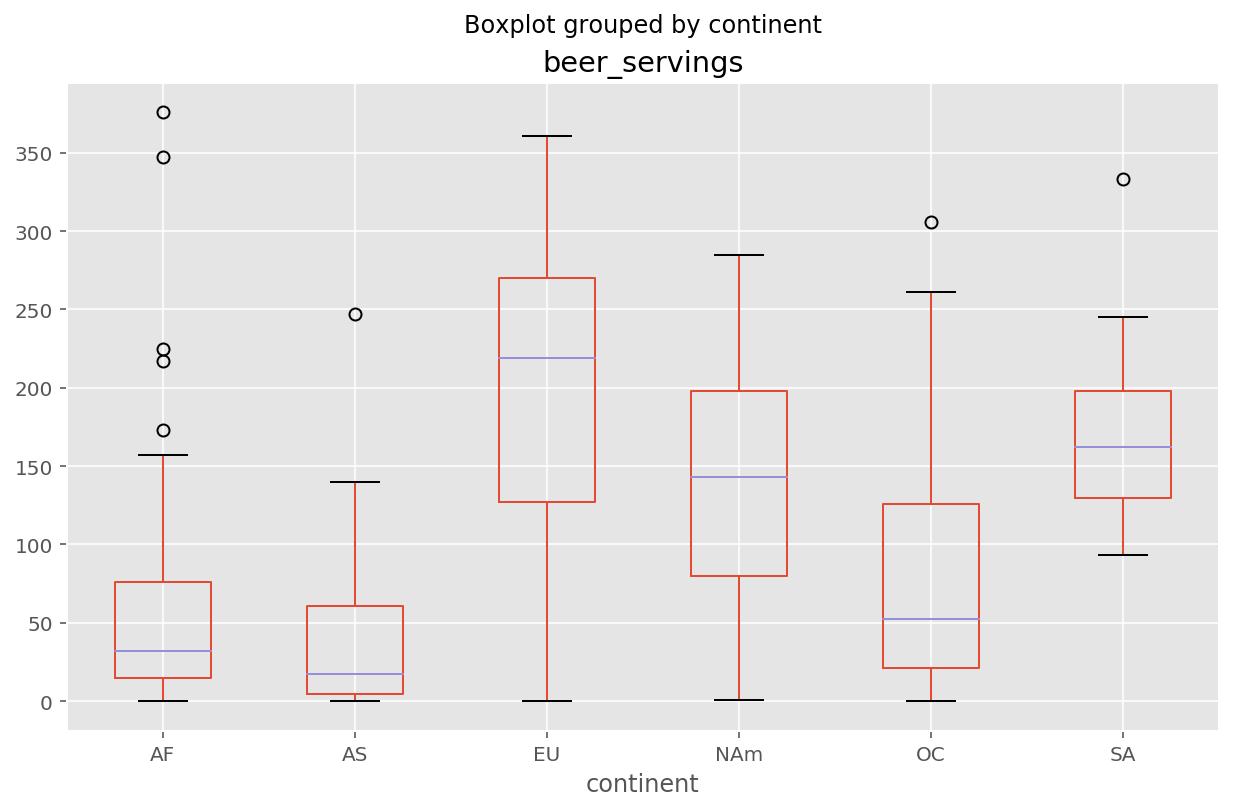

In [12]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/drinks.csv')
drinks.boxplot(column='beer_servings', by='continent');

#### Contraste de medias

In [13]:
muestra1 = drinks[drinks.continent=='EU']
muestra2 = drinks[drinks.continent=='AS']

st.ttest_ind(muestra1.beer_servings, muestra2.beer_servings) # underestimates p for unequal variances

Ttest_indResult(statistic=9.3660802384797677, pvalue=7.991808688642694e-15)

In [14]:
st.ttest_ind(muestra1.beer_servings, muestra2.beer_servings, equal_var = False)

Ttest_indResult(statistic=9.4306385094586265, pvalue=8.9929919893046418e-14)

#### Contraste para la igualdad de varianzas

In [15]:
F=muestra1.beer_servings.var()/muestra2.beer_servings.var()

df1=muestra1.beer_servings.size-1.0
df2=muestra2.beer_servings.size-1.0

p_value = st.f.cdf(F, df1, df2)
p_value

0.99999484884547829

El testadístico F es extremadamente sensible a la distribución normal de $X$ e $Y$. Si no hay seguridad de la normalidad de las distribuciones, sería conveniente realizar test más robustos como el de __Levene o Barlett__.

In [17]:
st.bartlett(muestra1.beer_servings, muestra2.beer_servings)

BartlettResult(statistic=19.457273721338403, pvalue=1.0287531843081512e-05)

In [18]:
st.levene(muestra1.beer_servings, muestra2.beer_servings, center='mean') # También puede hacerse center='median' (default)
# Aplicar este test cuando haya desviaciones significativas de normalidad 

LeveneResult(statistic=21.943555343037929, pvalue=1.0282725458828434e-05)

#### ¿Qué está pasando? 

¿Se cumplen las hipótesis para aplicar el test? ¿Se distribuyen los datos de forma normal?

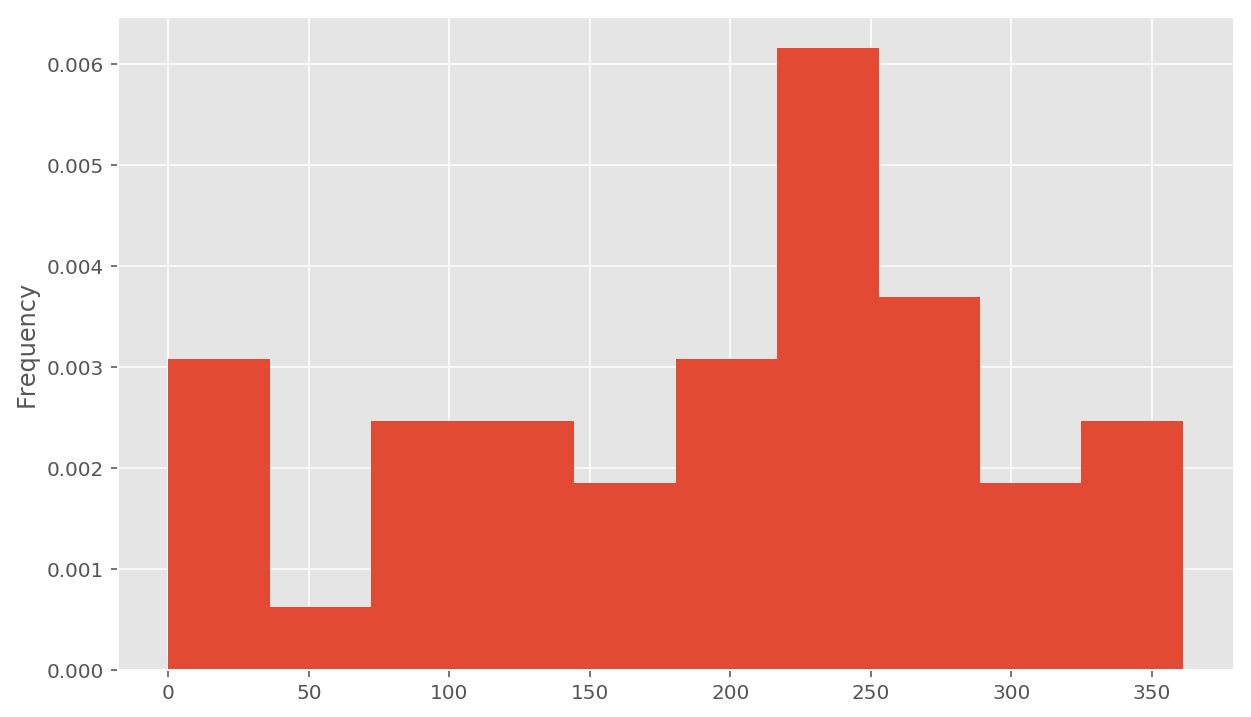

In [19]:
muestra1.beer_servings.plot(kind='hist', normed=True);

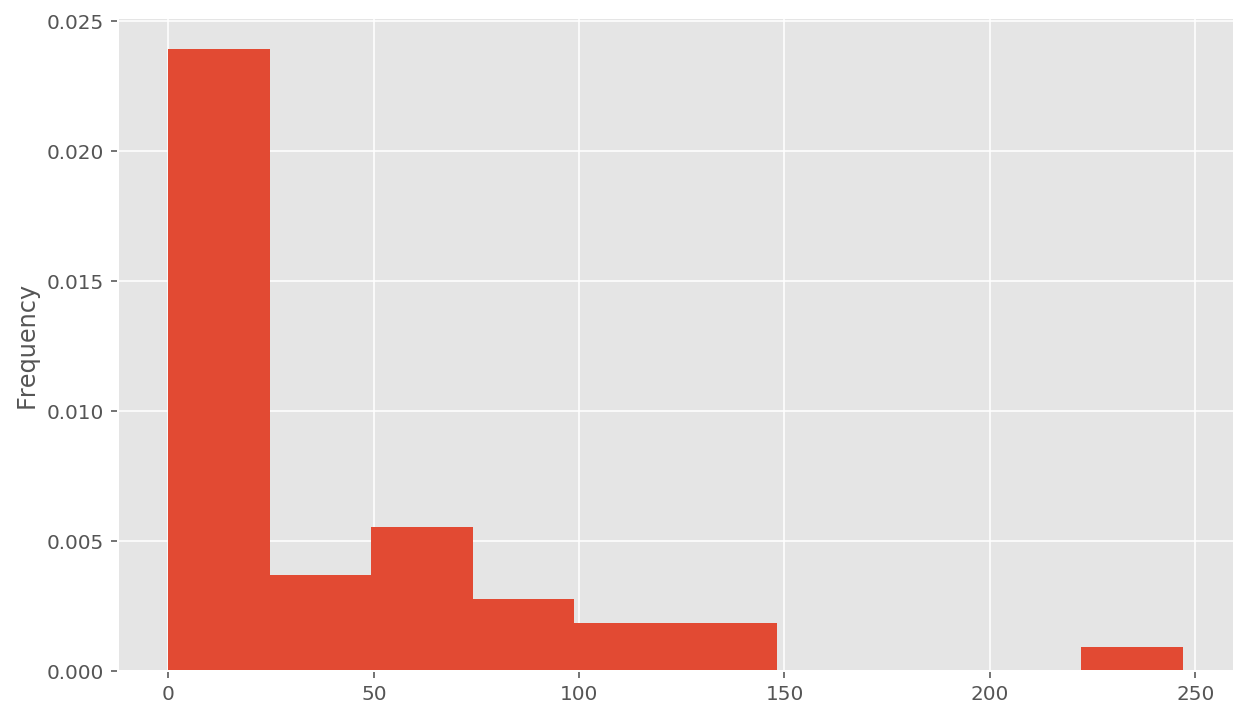

In [20]:
muestra2.beer_servings.plot(kind='hist', normed=True);

### Contrastes paramétricos para proporciones

**Suponemos** que la variable en estudio sigue una distribución
$X \sim\mathcal{B}e(p)$. Entonces el estadístico de contraste para el parámetro $p$ debe ser
    $d=\dfrac{(\overline{p}- p_0)\sqrt{n}}{\sqrt{p_0(1-p_0)}}$
    $$\begin{array}{|c|c|c|}
    \hline
      H_0 & H_1 & \mbox{Región crítica}  \\
      \hline\hline
      p = p_0 & p = p_1> p_0 & d \geq z_{1- \alpha}  \\
      \hline
      p = p_0 & p = p_1< p_0 & d \leq z_{\alpha}  \\
      \hline
      p = p_0 & p \neq p_0 & \mbox{$d \geq z_{1- \alpha/2}$ ó $d\leq z_{\alpha/2}$}  \\
      \hline
    \mbox{$p \leq p_0$ ó $p = p_0$}  & p > p_0 & d \geq z_{1- \alpha} \\
      \hline
    \mbox{$p \geq p_0$ ó $p = p_0$}  & p < p_0 & d \leq z_{\alpha} \\
      \hline
    \end{array}$$

**Suponemos** ahora que tenemos dos variables en estudio que siguen
distribuciones $X \sim \mathcal{B}e(p_1)$, $Y \sim\mathcal{B}e
(p_2)$ (independientes). Debe utilizarse el estadístico de contraste $d=
    \dfrac{\overline{p_1}-\overline{p_2}}{\sqrt{\overline{p}_{conj}(1-\overline
    {p}_{conj})\left(
    \frac{1}{n}+\frac{1}{m}\right)}}$,
    siendo $\overline{p}_{conj}=
    \dfrac{n\overline{p_1}+m\overline{p_2}}{n+m}$
    $$\begin{array}{|c|c|c|}
    \hline
      H_0 & H_1 & \mbox{Región crítica}  \\
      \hline\hline
       p_1 = p_2 & p_1 \neq p_2 & \mbox{$d \geq z_{1- \alpha/2}$ ó $d\leq z_{\alpha/2}$}  \\
      \hline
    \mbox{$p_1 \leq p_2$ ó $p_1 = p_2$}  & p_1 > p_2 & d \geq z_{1- \alpha} \\
      \hline
    \mbox{$p_1 \geq p_2$ ó $p_1 = p_2$}  & p_1 < p_2 & d \leq z_{\alpha} \\
      \hline
    \end{array}$$

**[Ejercicio]** Crear una función capaz de calcular un contraste para la diferencia de proporciones. 